# More Text Processing and Modeling

## Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

## Reading in the Data

In [3]:
df = pd.read_csv('./data/cleaned_posts.csv', index_col = 'Unnamed: 0')

In [4]:
df.head()

,subreddit,selftext,title,text,cleaned
0,1,NaN,The Great Law of Peace is supposed to have bee...,The Great Law of Peace is supposed to have bee...,the great law peac suppos compos upon found ha...
1,1,I am 18 years old right now and I am consideri...,Is there a way I can work with language preser...,I am 18 years old right now and I am consideri...,i year old right i consid option go colleg i l...
2,1,NaN,Why is genitive the second case?,Why is genitive the second case?,whi genit second case
3,1,I keep getting mixed results form just searchi...,what age can you no longer pick up a new accent,I keep getting mixed results form just searchi...,i keep get mix result form search i see end sa...
4,1,NaN,"Genitives and derived adjectives, Locatives an...","Genitives and derived adjectives, Locatives an...",genit deriv adject loc deriv adverb


In [54]:
df['selftext'] = df['selftext'].map(lambda x: '' if x == '[removed]' or x == 'NaN' or x == np.NaN or type(x) == float or x == 'nan' else x)

In [31]:
df = df[df['cleaned'].str.len()>300]

In [32]:
df.head()

,subreddit,selftext,title,text,cleaned
12,1,"some have observed, that while good old-fashio...",What are the basic problems of the CxG framework?,"some have observed, that while good old-fashio...",observ good old fashion valenc grammar quit go...
14,1,"I’m not a linguist, but I am polylingual and k...",What to do when members of a linguistic commun...,"I’m not a linguist, but I am polylingual and k...",i linguist i polylingu know lot grammar differ...
32,1,hey people 🙂 my name is Franek I am a 3rd year...,Lil job,hey people 🙂 my name is Franek I am a 3rd year...,hey peopl name franek i rd year fine art stude...
40,1,I want to know if people in different countrie...,Do people in different countries refer to thei...,I want to know if people in different countrie...,i want know peopl differ countri use anim refe...
49,1,"So, a few months, I was looking into other exa...",Palatal vs Palatalized Consonants,"So, a few months, I was looking into other exa...",so month i look exampl de rhotic r drop immedi...


In [33]:
df.shape

(761, 5)

In [58]:
df.subreddit.value_counts(normalize=True)

0    0.607096
1    0.392904
Name: subreddit, dtype: float64

In [34]:
X = df.cleaned
y = df.subreddit

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify = y)

In [36]:
#setting up pipelines
pipe_log = Pipeline([
    ('tvec', TfidfVectorizer()),
    ('log', LogisticRegression())
])

pipe_mnb = Pipeline([
    ('tvec', TfidfVectorizer()),
    ('mnb', MultinomialNB())
])

pipe_knn = Pipeline([
    ('tvec', TfidfVectorizer()),
    ('knn', KNeighborsClassifier())
])

pipe_rfc = Pipeline([
    ('tvec', TfidfVectorizer()),
    ('rfc', RandomForestClassifier())
])

log_par = {
    'tvec__max_features': [2_000, 3_000, 4_000, 5_000, 6_000],
    'tvec__binary': [True, False],
    'tvec__stop_words': ['english'],
    'tvec__ngram_range': [(1,1), (1,2)],
    'log__C': [1, 0.1, 0.01, 0.001],
    'log__solver': ['liblinear', 'lbfgs']
}

mnb_par = {
    'tvec__max_features': [2_000, 3_000, 4_000, 5_000, 6_000],
    'tvec__binary': [True, False],
    'tvec__stop_words': ['english'],
    'tvec__ngram_range': [(1,1), (1,2)],
}

knn_par = {
    'knn__n_neighbors': [3, 5, 7, 9],
    'knn__weights': ['uniform', 'distance'],
    'knn__p': [1, 2],
    'tvec__max_features': [2_000, 3_000, 4_000, 5_000, 6_000],
    'tvec__binary': [True, False],
    'tvec__stop_words': ['english'],
    'tvec__ngram_range': [(1,1), (1,2)]
}
    
rfc_par = {
    'rfc__n_estimators': [50, 100, 150, 200],
    'rfc__max_depth': [None, 1, 2, 3, 4, 5],
    'tvec__max_features': [2_000, 3_000, 4_000, 5_000, 6_000],
    'tvec__binary': [True, False],
    'tvec__stop_words': ['english'],
    'tvec__ngram_range': [(1,1), (1,2)],
}

In [37]:
gsl = GridSearchCV(pipe_log, param_grid = log_par, n_jobs = -1, cv = 3)

In [38]:
gsl.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('tvec', TfidfVectorizer()),
                                       ('log', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'log__C': [1, 0.1, 0.01, 0.001],
                         'log__solver': ['liblinear', 'lbfgs'],
                         'tvec__binary': [True, False],
                         'tvec__max_features': [2000, 3000, 4000, 5000, 6000],
                         'tvec__ngram_range': [(1, 1), (1, 2)],
                         'tvec__stop_words': ['english']})

In [43]:
gsm = GridSearchCV(pipe_mnb, param_grid = mnb_par, n_jobs = -1, cv = 3)

In [44]:
gsm.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('tvec', TfidfVectorizer()),
                                       ('mnb', MultinomialNB())]),
             n_jobs=-1,
             param_grid={'tvec__binary': [True, False],
                         'tvec__max_features': [2000, 3000, 4000, 5000, 6000],
                         'tvec__ngram_range': [(1, 1), (1, 2)],
                         'tvec__stop_words': ['english']})

In [45]:
gsk = GridSearchCV(pipe_knn, param_grid = knn_par, n_jobs = -1, cv = 3)

In [46]:
gsk.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('tvec', TfidfVectorizer()),
                                       ('knn', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'knn__n_neighbors': [3, 5, 7, 9], 'knn__p': [1, 2],
                         'knn__weights': ['uniform', 'distance'],
                         'tvec__binary': [True, False],
                         'tvec__max_features': [2000, 3000, 4000, 5000, 6000],
                         'tvec__ngram_range': [(1, 1), (1, 2)],
                         'tvec__stop_words': ['english']})

In [47]:
gsr = GridSearchCV(pipe_rfc, param_grid = rfc_par, n_jobs = -1, cv = 3)

In [48]:
gsr.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('tvec', TfidfVectorizer()),
                                       ('rfc', RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'rfc__max_depth': [None, 1, 2, 3, 4, 5],
                         'rfc__n_estimators': [50, 100, 150, 200],
                         'tvec__binary': [True, False],
                         'tvec__max_features': [2000, 3000, 4000, 5000, 6000],
                         'tvec__ngram_range': [(1, 1), (1, 2)],
                         'tvec__stop_words': ['english']})

In [49]:
gsl.score(X_train, y_train), gsl.score(X_test, y_test)

(0.9701754385964912, 0.8848167539267016)

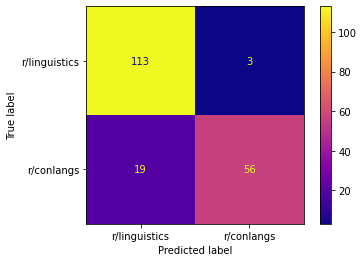

In [50]:
plot_confusion_matrix(gsl, X_test, y_test, display_labels=['r/linguistics', 'r/conlangs'], cmap = 'plasma');

In [51]:
gsm.best_estimator_.score(X_train, y_train), gsm.best_estimator_.score(X_test, y_test)

(0.9473684210526315, 0.9109947643979057)

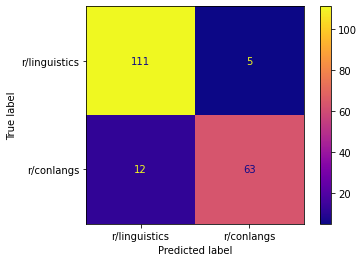

In [52]:
plot_confusion_matrix(gsm, X_test, y_test, display_labels=['r/linguistics', 'r/conlangs'], cmap = 'plasma');

In [53]:
gsk.score(X_train, y_train), gsk.score(X_test, y_test)

(0.9982456140350877, 0.9109947643979057)

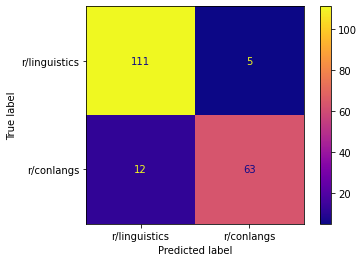

In [54]:
plot_confusion_matrix(gsk, X_test, y_test, display_labels=['r/linguistics', 'r/conlangs'], cmap = 'plasma');

In [60]:
gsr.score(X_train, y_train), gsr.score(X_test, y_test)

(1.0, 0.8795811518324608)

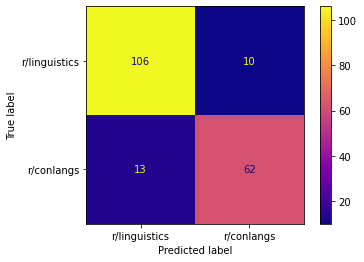

In [56]:
plot_confusion_matrix(gsr, X_test, y_test, display_labels=['r/linguistics', 'r/conlangs'], cmap = 'plasma');